<a href="https://colab.research.google.com/github/AswinAsh369/Sentiment_Analysis_NLP_ChatGPT_Tweets/blob/main/Analysing_and_Predicting_Twitter_Sentiments_towards_Chatgpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Sentiment Analysis : Predicting sentiment towards CHAT-GPT Tweets**

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('./chatgpt_daily_tweets.csv')
data


,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_name,user_username,user_location,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,source,retweet_count,like_count,reply_count,impression_count
0,1.642889622681432e+18,2023-04-03 13:59:44+00:00,2023-04-08 01:07:02.538242,RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...,th,4706577259,👷🏼 ♡ #GOT7,BPawarisa1a,ในใจJacksonwang,@JacksonWang852 ➖ รีวิว #รีวิวแบมพี #แบมพีอัพเ...,2016-01-04 02:27:33+00:00,1293.0,445.0,87051.0,False,NaN,13640.0,0.0,0.0,0.0
1,1.6428442314496123e+18,2023-04-03 10:59:22+00:00,2023-04-08 01:06:59.379927,ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...,ja,2264288640,ミミズクりんゆ,DRVO_Project,東京←岐阜,料理垢です。ｳｪｯﾌﾞ4年目 発言はファッキン個人の見解 TypeScript/Vue/Re...,2013-12-27 12:39:07+00:00,7878.0,4941.0,76597.0,False,NaN,0.0,0.0,0.0,290.0
2,1.6427385624866693e+18,2023-04-03 03:59:28+00:00,2023-04-08 01:06:52.504868,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,pk,pradeep42329225,India,💐💐।।जय श्री महाकाल।।💐💐,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,False,NaN,628.0,0.0,0.0,0.0
3,1.6429198880616448e+18,2023-04-03 15:59:59+00:00,2023-04-08 01:07:04.742617,Get an intelligent chatbot for your website in...,en,1633040597782081537,AR Leyva,ArrheniusLey,United Kingdom,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,False,NaN,0.0,0.0,0.0,58.0
4,1.642708351690711e+18,2023-04-03 01:59:25+00:00,2023-04-08 01:06:50.638068,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",en,1311403370670960640,Human Being 🇨🇳🇸🇬🇻🇳,KiarostamiBeing,"Chicago, IL",Freedom is the Recognition of Necessity • Mark...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,False,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41998,1656569585808687104,2023-05-11 07:59:01+00:00,2023-05-13 20:37:32.304839,RT @rmotta2: Vejam o que eu perguntei ao ChatG...,pt,995804331914887168,Kn/GEED+GETTER,GeedKn,NaN,NaN,2018-05-13 23:13:48+00:00,303.0,507.0,187734.0,False,NaN,1619.0,0.0,0.0,0.0
41999,1656464092612407297,2023-05-11 00:59:49+00:00,2023-05-13 20:37:25.791930,@martinfrogers But if you asked ChatGPT to wri...,en,920920966334578688,Michael Surridge,Mike5urridge,"Sydney, New South Wales",NaN,2017-10-19 07:54:03+00:00,93.0,186.0,414.0,False,NaN,0.0,1.0,1.0,65.0
42000,1656690619635359744,2023-05-11 15:59:58+00:00,2023-05-13 20:37:41.107929,@Baeson10 @CptJinglePants I suspected chatGPT,en,2191479649,Carmel Eustace,carmeleustace,NaN,NaN,2013-11-13 02:36:30+00:00,86.0,278.0,6747.0,False,NaN,0.0,2.0,0.0,13.0
42001,1656660334378360834,2023-05-11 13:59:37+00:00,2023-05-13 20:37:38.683546,RT @PythonPr: How to use ChatGPT in Python usi...,en,1590938064897003520,しおさとう,nechi0306,NaN,Twitterは俺のメモ帳,2022-11-11 05:23:04+00:00,5.0,45.0,81.0,False,NaN,114.0,0.0,0.0,0.0


### Exploratory Data Analysis

In [3]:
data.shape

(42003, 20)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42003 entries, 0 to 42002
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              42003 non-null  object 
 1   tweet_created         42003 non-null  object 
 2   tweet_extracted       42003 non-null  object 
 3   text                  42003 non-null  object 
 4   lang                  42003 non-null  object 
 5   user_id               42003 non-null  object 
 6   user_name             41998 non-null  object 
 7   user_username         42003 non-null  object 
 8   user_location         24929 non-null  object 
 9   user_description      35575 non-null  object 
 10  user_created          41998 non-null  object 
 11  user_followers_count  41995 non-null  float64
 12  user_following_count  41995 non-null  float64
 13  user_tweet_count      41995 non-null  float64
 14  user_verified         41995 non-null  object 
 15  source             

In [5]:
data.describe()

,user_followers_count,user_following_count,user_tweet_count,source,retweet_count,like_count,reply_count,impression_count
count,4.199500e+04,41995.000000,4.199500e+04,0.0,41995.000000,41995.000000,41995.000000,4.199500e+04
mean,7.244786e+03,1481.170377,5.423857e+04,NaN,1329.251792,3.042005,0.320919,4.985036e+02
std,1.825425e+05,7097.828369,1.905184e+05,NaN,4062.503156,82.673145,10.422325,1.356333e+04
min,0.000000e+00,0.000000,0.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000e+00
25%,4.700000e+01,149.000000,9.870000e+02,NaN,0.000000,0.000000,0.000000,0.000000e+00
50%,2.250000e+02,454.000000,6.162000e+03,NaN,28.000000,0.000000,0.000000,0.000000e+00
75%,9.640000e+02,1252.000000,3.290850e+04,NaN,783.000000,0.000000,0.000000,1.600000e+01
max,2.720585e+07,414729.000000,3.384535e+06,NaN,42548.000000,9170.000000,2009.000000,1.220101e+06


In [6]:
data.dtypes

tweet_id                 object
tweet_created            object
tweet_extracted          object
text                     object
lang                     object
user_id                  object
user_name                object
user_username            object
user_location            object
user_description         object
user_created             object
user_followers_count    float64
user_following_count    float64
user_tweet_count        float64
user_verified            object
source                  float64
retweet_count           float64
like_count              float64
reply_count             float64
impression_count        float64
dtype: object

In [7]:
#Checking null values

data.isna().sum()

tweet_id                    0
tweet_created               0
tweet_extracted             0
text                        0
lang                        0
user_id                     0
user_name                   5
user_username               0
user_location           17074
user_description         6428
user_created                5
user_followers_count        8
user_following_count        8
user_tweet_count            8
user_verified               8
source                  42003
retweet_count               8
like_count                  8
reply_count                 8
impression_count            8
dtype: int64

In [8]:
#Checking unique values in columns

for column in data.columns:
   print(f"Unique values in {column}: {data[column].nunique()}")

Unique values in tweet_id: 39959
Unique values in tweet_created: 29126
Unique values in tweet_extracted: 1011
Unique values in text: 25110
Unique values in lang: 57
Unique values in user_id: 37296
Unique values in user_name: 36487
Unique values in user_username: 37320
Unique values in user_location: 12979
Unique values in user_description: 31653
Unique values in user_created: 37289
Unique values in user_followers_count: 6766
Unique values in user_following_count: 5298
Unique values in user_tweet_count: 23165
Unique values in user_verified: 2
Unique values in source: 0
Unique values in retweet_count: 2144
Unique values in like_count: 203
Unique values in reply_count: 63
Unique values in impression_count: 1814


In [9]:
#Displaying Categorical columns

cat_data=data.select_dtypes(include=['object','bool'])
cat_data

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_name,user_username,user_location,user_description,user_created,user_verified
0,1.642889622681432e+18,2023-04-03 13:59:44+00:00,2023-04-08 01:07:02.538242,RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...,th,4706577259,👷🏼 ♡ #GOT7,BPawarisa1a,ในใจJacksonwang,@JacksonWang852 ➖ รีวิว #รีวิวแบมพี #แบมพีอัพเ...,2016-01-04 02:27:33+00:00,False
1,1.6428442314496123e+18,2023-04-03 10:59:22+00:00,2023-04-08 01:06:59.379927,ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...,ja,2264288640,ミミズクりんゆ,DRVO_Project,東京←岐阜,料理垢です。ｳｪｯﾌﾞ4年目 発言はファッキン個人の見解 TypeScript/Vue/Re...,2013-12-27 12:39:07+00:00,False
2,1.6427385624866693e+18,2023-04-03 03:59:28+00:00,2023-04-08 01:06:52.504868,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,pk,pradeep42329225,India,💐💐।।जय श्री महाकाल।।💐💐,2014-03-11 06:04:10+00:00,False
3,1.6429198880616448e+18,2023-04-03 15:59:59+00:00,2023-04-08 01:07:04.742617,Get an intelligent chatbot for your website in...,en,1633040597782081537,AR Leyva,ArrheniusLey,United Kingdom,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,False
4,1.642708351690711e+18,2023-04-03 01:59:25+00:00,2023-04-08 01:06:50.638068,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",en,1311403370670960640,Human Being 🇨🇳🇸🇬🇻🇳,KiarostamiBeing,"Chicago, IL",Freedom is the Recognition of Necessity • Mark...,2020-09-30 20:32:00+00:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...
41998,1656569585808687104,2023-05-11 07:59:01+00:00,2023-05-13 20:37:32.304839,RT @rmotta2: Vejam o que eu perguntei ao ChatG...,pt,995804331914887168,Kn/GEED+GETTER,GeedKn,NaN,NaN,2018-05-13 23:13:48+00:00,False
41999,1656464092612407297,2023-05-11 00:59:49+00:00,2023-05-13 20:37:25.791930,@martinfrogers But if you asked ChatGPT to wri...,en,920920966334578688,Michael Surridge,Mike5urridge,"Sydney, New South Wales",NaN,2017-10-19 07:54:03+00:00,False
42000,1656690619635359744,2023-05-11 15:59:58+00:00,2023-05-13 20:37:41.107929,@Baeson10 @CptJinglePants I suspected chatGPT,en,2191479649,Carmel Eustace,carmeleustace,NaN,NaN,2013-11-13 02:36:30+00:00,False
42001,1656660334378360834,2023-05-11 13:59:37+00:00,2023-05-13 20:37:38.683546,RT @PythonPr: How to use ChatGPT in Python usi...,en,1590938064897003520,しおさとう,nechi0306,NaN,Twitterは俺のメモ帳,2022-11-11 05:23:04+00:00,False


In [10]:
#Dropping unnecessary columns

data=data.drop(['user_name'],axis=1)
data=data.drop(['user_username'],axis=1)
data=data.drop(['user_location'],axis=1)

In [11]:
#Displaying numerical columns

num_data=data.select_dtypes(include=['float','int64'])
num_data

,user_followers_count,user_following_count,user_tweet_count,source,retweet_count,like_count,reply_count,impression_count
0,1293.0,445.0,87051.0,NaN,13640.0,0.0,0.0,0.0
1,7878.0,4941.0,76597.0,NaN,0.0,0.0,0.0,290.0
2,269.0,4141.0,3816.0,NaN,628.0,0.0,0.0,0.0
3,264.0,24.0,198.0,NaN,0.0,0.0,0.0,58.0
4,447.0,419.0,12949.0,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
41998,303.0,507.0,187734.0,NaN,1619.0,0.0,0.0,0.0
41999,93.0,186.0,414.0,NaN,0.0,1.0,1.0,65.0
42000,86.0,278.0,6747.0,NaN,0.0,2.0,0.0,13.0
42001,5.0,45.0,81.0,NaN,114.0,0.0,0.0,0.0


In [12]:
#Dropping unnecessary columns

data=data.drop(['source'],axis=1)

In [13]:
pd.set_option('display.max_columns', None)
data

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,retweet_count,like_count,reply_count,impression_count
0,1.642889622681432e+18,2023-04-03 13:59:44+00:00,2023-04-08 01:07:02.538242,RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...,th,4706577259,@JacksonWang852 ➖ รีวิว #รีวิวแบมพี #แบมพีอัพเ...,2016-01-04 02:27:33+00:00,1293.0,445.0,87051.0,False,13640.0,0.0,0.0,0.0
1,1.6428442314496123e+18,2023-04-03 10:59:22+00:00,2023-04-08 01:06:59.379927,ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...,ja,2264288640,料理垢です。ｳｪｯﾌﾞ4年目 発言はファッキン個人の見解 TypeScript/Vue/Re...,2013-12-27 12:39:07+00:00,7878.0,4941.0,76597.0,False,0.0,0.0,0.0,290.0
2,1.6427385624866693e+18,2023-04-03 03:59:28+00:00,2023-04-08 01:06:52.504868,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,💐💐।।जय श्री महाकाल।।💐💐,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,False,628.0,0.0,0.0,0.0
3,1.6429198880616448e+18,2023-04-03 15:59:59+00:00,2023-04-08 01:07:04.742617,Get an intelligent chatbot for your website in...,en,1633040597782081537,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,False,0.0,0.0,0.0,58.0
4,1.642708351690711e+18,2023-04-03 01:59:25+00:00,2023-04-08 01:06:50.638068,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",en,1311403370670960640,Freedom is the Recognition of Necessity • Mark...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,False,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41998,1656569585808687104,2023-05-11 07:59:01+00:00,2023-05-13 20:37:32.304839,RT @rmotta2: Vejam o que eu perguntei ao ChatG...,pt,995804331914887168,NaN,2018-05-13 23:13:48+00:00,303.0,507.0,187734.0,False,1619.0,0.0,0.0,0.0
41999,1656464092612407297,2023-05-11 00:59:49+00:00,2023-05-13 20:37:25.791930,@martinfrogers But if you asked ChatGPT to wri...,en,920920966334578688,NaN,2017-10-19 07:54:03+00:00,93.0,186.0,414.0,False,0.0,1.0,1.0,65.0
42000,1656690619635359744,2023-05-11 15:59:58+00:00,2023-05-13 20:37:41.107929,@Baeson10 @CptJinglePants I suspected chatGPT,en,2191479649,NaN,2013-11-13 02:36:30+00:00,86.0,278.0,6747.0,False,0.0,2.0,0.0,13.0
42001,1656660334378360834,2023-05-11 13:59:37+00:00,2023-05-13 20:37:38.683546,RT @PythonPr: How to use ChatGPT in Python usi...,en,1590938064897003520,Twitterは俺のメモ帳,2022-11-11 05:23:04+00:00,5.0,45.0,81.0,False,114.0,0.0,0.0,0.0


### Generating New Time Variables


In [14]:
# Generating new time variables
data['tweet_created'] = pd.to_datetime(data['tweet_created'])
data['OnlyDate'] = data['tweet_created'].dt.date
data['OnlyDate'] = pd.to_datetime(data['OnlyDate'])
data['OnlyHour'] = data['tweet_created'].dt.hour
data['OnlyMin'] = data['tweet_created'].dt.minute

In [15]:
data.head()


,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,retweet_count,like_count,reply_count,impression_count,OnlyDate,OnlyHour,OnlyMin
0,1.642889622681432e+18,2023-04-03 13:59:44+00:00,2023-04-08 01:07:02.538242,RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...,th,4706577259,@JacksonWang852 ➖ รีวิว #รีวิวแบมพี #แบมพีอัพเ...,2016-01-04 02:27:33+00:00,1293.0,445.0,87051.0,False,13640.0,0.0,0.0,0.0,2023-04-03,13,59
1,1.6428442314496123e+18,2023-04-03 10:59:22+00:00,2023-04-08 01:06:59.379927,ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...,ja,2264288640,料理垢です。ｳｪｯﾌﾞ4年目 発言はファッキン個人の見解 TypeScript/Vue/Re...,2013-12-27 12:39:07+00:00,7878.0,4941.0,76597.0,False,0.0,0.0,0.0,290.0,2023-04-03,10,59
2,1.6427385624866693e+18,2023-04-03 03:59:28+00:00,2023-04-08 01:06:52.504868,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,💐💐।।जय श्री महाकाल।।💐💐,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,False,628.0,0.0,0.0,0.0,2023-04-03,3,59
3,1.6429198880616448e+18,2023-04-03 15:59:59+00:00,2023-04-08 01:07:04.742617,Get an intelligent chatbot for your website in...,en,1633040597782081537,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,False,0.0,0.0,0.0,58.0,2023-04-03,15,59
4,1.642708351690711e+18,2023-04-03 01:59:25+00:00,2023-04-08 01:06:50.638068,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",en,1311403370670960640,Freedom is the Recognition of Necessity • Mark...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,False,0.0,0.0,0.0,0.0,2023-04-03,1,59


### First Exploratory Data Analysis Works

In [16]:
def plot_time_variable(col, ylim_lower = 100, ylim_upper = 3000):
    """
    Given a pandas dataframe and the name of a time column, this function will plot a line graph of time counts
    using the specified column.

    Parameters:
    -----------
    col : str
        The name of a column in the pandas dataframe.
    """

    if data[col].dtype == "int64":
        time_variable_counts = data[col].value_counts().sort_index()

    else:
        # calculate the count of dates using resample
        time_variable_counts = data[col].value_counts().resample('D').sum()

    # set the size of the figure
    plt.figure(figsize=(12, 8))

    # plot the counts using a line graph
    time_variable_counts.plot(kind='line', marker='o', markersize=8)

    # set the y-axis limits to a specific range
    plt.ylim(ylim_lower, ylim_upper)

    # add graph labels and titles
    plt.title(f"{col} Counts", fontsize=16)
    plt.xlabel(f"{col}", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=45, ha='right') # rotate x-axis labels for readability
    plt.grid(axis='y', linestyle='--')

    # display the graph
    plt.show()

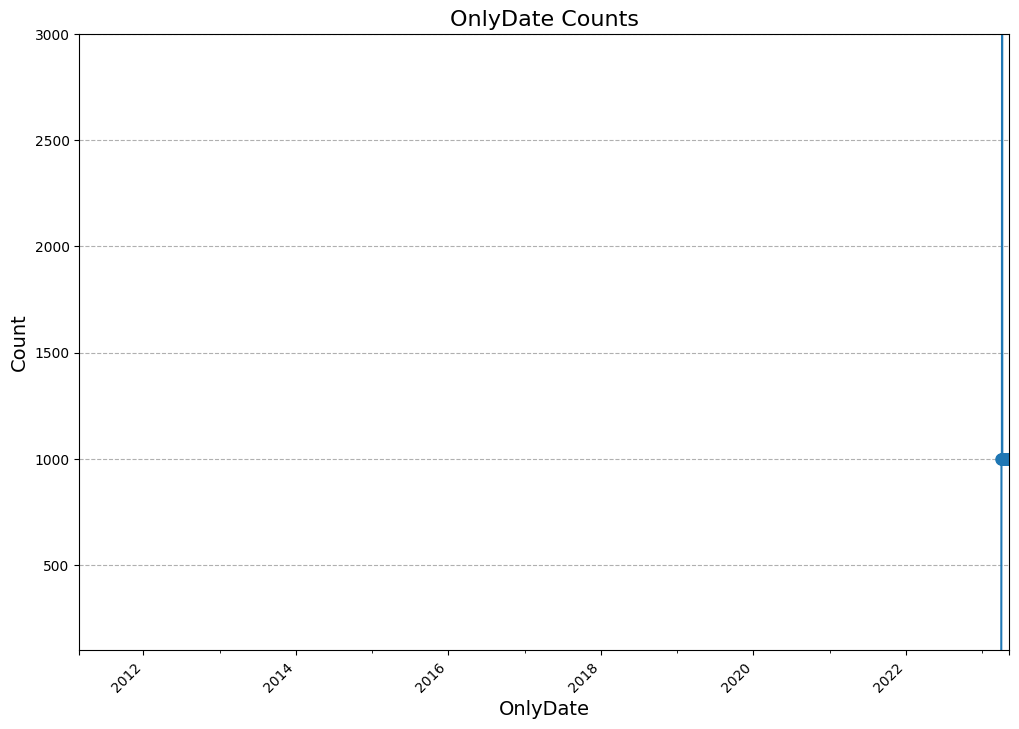

In [17]:
plot_time_variable('OnlyDate')

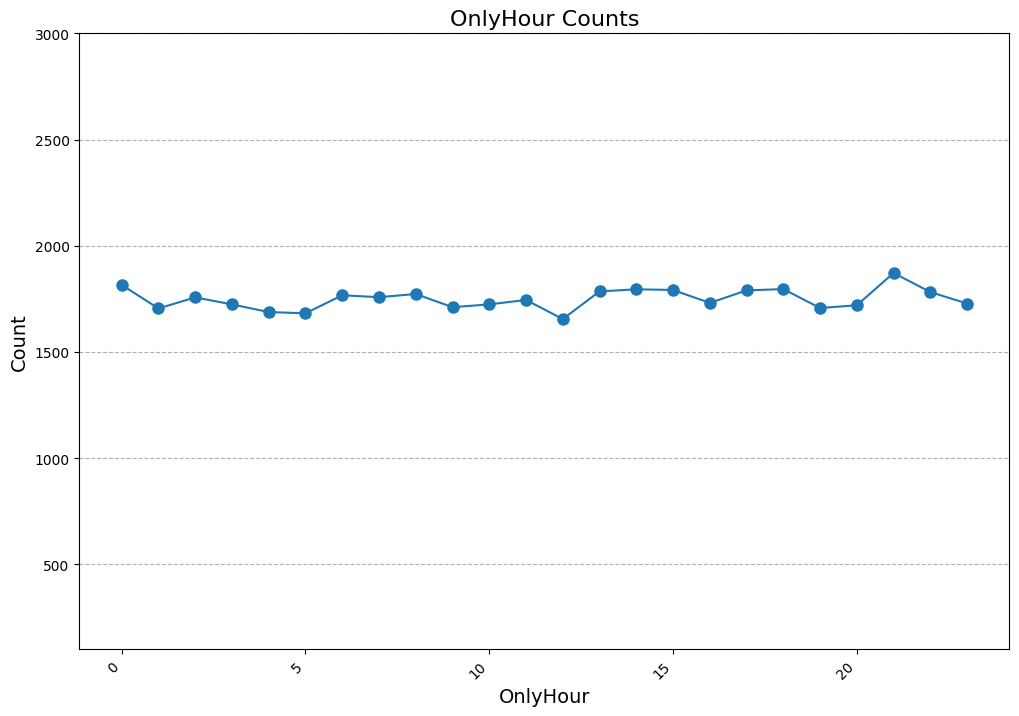

In [18]:
plot_time_variable('OnlyHour', 100, 3000)

### Handling missing values

In [19]:
data.isna().sum()

tweet_id                   0
tweet_created              0
tweet_extracted            0
text                       0
lang                       0
user_id                    0
user_description        6428
user_created               5
user_followers_count       8
user_following_count       8
user_tweet_count           8
user_verified              8
retweet_count              8
like_count                 8
reply_count                8
impression_count           8
OnlyDate                   0
OnlyHour                   0
OnlyMin                    0
dtype: int64

In [20]:
data.dropna(inplace=True)

In [21]:
data.isna().sum()

tweet_id                0
tweet_created           0
tweet_extracted         0
text                    0
lang                    0
user_id                 0
user_description        0
user_created            0
user_followers_count    0
user_following_count    0
user_tweet_count        0
user_verified           0
retweet_count           0
like_count              0
reply_count             0
impression_count        0
OnlyDate                0
OnlyHour                0
OnlyMin                 0
dtype: int64

In [22]:
data.shape

(35569, 19)

In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer

In [24]:
import string

In [25]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [26]:
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove @mentions
    text = re.sub(r'#\w+', '', text) # remove hashtags
    text = re.sub(r'RT[\s]+', '', text) # remove retweets
    text = re.sub(r'https?:\/\/S+', '', text) # remove hyperlinks
    text = re.sub(r'[^\x00-\x7F]+', '', text) # remove non-ASCII characters
    text = text.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation))) # remove punctutions
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens] # stemming
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens] # lemmatization
    clean_text = ' '.join(lemmatized_tokens)
    return clean_text

data['clean_text'] = data['text'].apply(clean_text)
data['clean_text'] = data['clean_text'].str.lower() # lowercase

In [27]:
data.head()


,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,retweet_count,like_count,reply_count,impression_count,OnlyDate,OnlyHour,OnlyMin,clean_text
0,1.642889622681432e+18,2023-04-03 13:59:44+00:00,2023-04-08 01:07:02.538242,RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...,th,4706577259,@JacksonWang852 ➖ รีวิว #รีวิวแบมพี #แบมพีอัพเ...,2016-01-04 02:27:33+00:00,1293.0,445.0,87051.0,False,13640.0,0.0,0.0,0.0,2023-04-03,13,59,chatgpt
1,1.6428442314496123e+18,2023-04-03 10:59:22+00:00,2023-04-08 01:06:59.379927,ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...,ja,2264288640,料理垢です。ｳｪｯﾌﾞ4年目 発言はファッキン個人の見解 TypeScript/Vue/Re...,2013-12-27 12:39:07+00:00,7878.0,4941.0,76597.0,False,0.0,0.0,0.0,290.0,2023-04-03,10,59,chatgptchrome4 http t co hfacfe570t
2,1.6427385624866693e+18,2023-04-03 03:59:28+00:00,2023-04-08 01:06:52.504868,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,💐💐।।जय श्री महाकाल।।💐💐,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,False,628.0,0.0,0.0,0.0,2023-04-03,3,59,chatgpt plugin are the fastest way to get rich...
3,1.6429198880616448e+18,2023-04-03 15:59:59+00:00,2023-04-08 01:07:04.742617,Get an intelligent chatbot for your website in...,en,1633040597782081537,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,False,0.0,0.0,0.0,58.0,2023-04-03,15,59,get an intellig chatbot for your websit in min...
4,1.642708351690711e+18,2023-04-03 01:59:25+00:00,2023-04-08 01:06:50.638068,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",en,1311403370670960640,Freedom is the Recognition of Necessity • Mark...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,False,0.0,0.0,0.0,0.0,2023-04-03,1,59,hey guy ha launch at just 55 000 usd marketcap...


### Data Preprocessing for Sentiment Analysis and Model

In [28]:
 # Function to perform sentiment analysis on a piece of text using the TextBlob library in Python.
# get_sentiment_polarity() function uses the TextBlob library to analyze the sentiment polarity of a given text.
from textblob import TextBlob
import numpy as np

def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

data['sentiment_polarity'] = data['clean_text'].apply(get_sentiment_polarity)
data['sentiment'] = np.where(data['sentiment_polarity'] > 0, 'positive',
                             np.where(data['sentiment_polarity'] < 0, 'negative', 'neutral'))

In [29]:
data


,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,retweet_count,like_count,reply_count,impression_count,OnlyDate,OnlyHour,OnlyMin,clean_text,sentiment_polarity,sentiment
0,1.642889622681432e+18,2023-04-03 13:59:44+00:00,2023-04-08 01:07:02.538242,RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...,th,4706577259,@JacksonWang852 ➖ รีวิว #รีวิวแบมพี #แบมพีอัพเ...,2016-01-04 02:27:33+00:00,1293.0,445.0,87051.0,False,13640.0,0.0,0.0,0.0,2023-04-03,13,59,chatgpt,0.000,neutral
1,1.6428442314496123e+18,2023-04-03 10:59:22+00:00,2023-04-08 01:06:59.379927,ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...,ja,2264288640,料理垢です。ｳｪｯﾌﾞ4年目 発言はファッキン個人の見解 TypeScript/Vue/Re...,2013-12-27 12:39:07+00:00,7878.0,4941.0,76597.0,False,0.0,0.0,0.0,290.0,2023-04-03,10,59,chatgptchrome4 http t co hfacfe570t,0.000,neutral
2,1.6427385624866693e+18,2023-04-03 03:59:28+00:00,2023-04-08 01:06:52.504868,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,💐💐।।जय श्री महाकाल।।💐💐,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,False,628.0,0.0,0.0,0.0,2023-04-03,3,59,chatgpt plugin are the fastest way to get rich...,0.375,positive
3,1.6429198880616448e+18,2023-04-03 15:59:59+00:00,2023-04-08 01:07:04.742617,Get an intelligent chatbot for your website in...,en,1633040597782081537,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,False,0.0,0.0,0.0,58.0,2023-04-03,15,59,get an intellig chatbot for your websit in min...,0.000,neutral
4,1.642708351690711e+18,2023-04-03 01:59:25+00:00,2023-04-08 01:06:50.638068,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",en,1311403370670960640,Freedom is the Recognition of Necessity • Mark...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,False,0.0,0.0,0.0,0.0,2023-04-03,1,59,hey guy ha launch at just 55 000 usd marketcap...,0.000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41994,1656811321336242178,2023-05-11 23:59:35+00:00,2023-05-13 20:37:51.581361,Fig gymnastics champion ChatGPT账号 \n#ChatGPT h...,cy,2290844445,自助下单秒发货: https://t.co/0BqnQAWxGy TG客服：\n@kara...,2014-01-19 02:30:50+00:00,106.0,228.0,281.0,False,10.0,10.0,11.0,7.0,2023-05-11,23,59,fig gymnast champion chatgpt http t co pl3lkd61ra,0.000,neutral
41995,1656675449316200448,2023-05-11 14:59:41+00:00,2023-05-13 20:37:39.928555,RT @hasantoxr: Best ChatGPT Prompts Technique ...,en,50418885,HR & stuff.,2009-06-24 20:07:46+00:00,6623.0,4875.0,79315.0,False,289.0,0.0,0.0,0.0,2023-05-11,14,59,best chatgpt prompt techniqu to help you maste...,1.000,positive
41997,1656630170374270977,2023-05-11 11:59:45+00:00,2023-05-13 20:37:36.406371,RT @LocalizerBrave: ホントのこと言ってもなかなか信じてくれなくてこのあと...,ja,3955907478,推しが尊い… 一応20↑,2015-10-20 08:10:24+00:00,137.0,290.0,170802.0,False,29.0,0.0,0.0,0.0,2023-05-11,11,59,chatgpt http t co ixu9vaqwtl,0.000,neutral
42001,1656660334378360834,2023-05-11 13:59:37+00:00,2023-05-13 20:37:38.683546,RT @PythonPr: How to use ChatGPT in Python usi...,en,1590938064897003520,Twitterは俺のメモ帳,2022-11-11 05:23:04+00:00,5.0,45.0,81.0,False,114.0,0.0,0.0,0.0,2023-05-11,13,59,how to use chatgpt in python use pychatgpt htt...,0.000,neutral


In [30]:
headers = ['clean_text', 'sentiment']
df = pd.DataFrame(data, columns=headers)

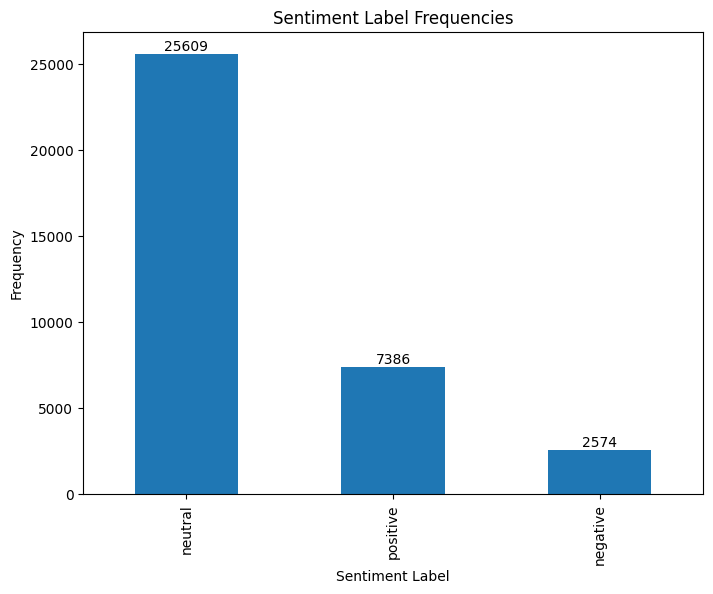

In [31]:
# count the frequency of each sentiment label
sentiment_counts = data.sentiment.value_counts()

# create a column plot
fig, ax = plt.subplots(figsize=(8,6))
sentiment_counts.plot(kind='bar', ax=ax)

# set the plot title and axis labels
ax.set_title('Sentiment Label Frequencies')
ax.set_xlabel('Sentiment Label')
ax.set_ylabel('Frequency')

# add data labels to the top of each column
for i, freq in enumerate(sentiment_counts):
    ax.text(i, freq, str(freq), ha='center', va='bottom')

# display the plot
plt.show()

In [32]:
import plotly.offline as pyo
import plotly.graph_objects as go
# Get the value counts for user_verified
value_counts = data['sentiment'].value_counts()

## Create a pie chart using Plotly
labels = value_counts.index
values = value_counts.values

trace = go.Pie(labels=labels, values=values)
layout = go.Layout(title='Sentiment Classification', width=600, height=400)

fig = go.Figure(data=[trace], layout=layout)

# Display the chart
pyo.iplot(fig)

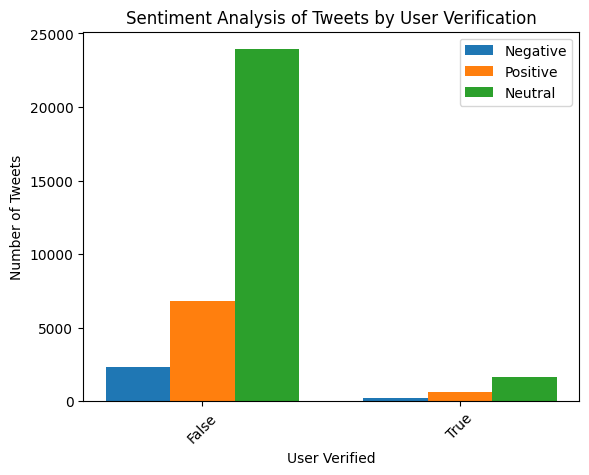

In [33]:
# Create a new DataFrame with counts of each sentiment per user_verified
count_data = data.groupby(['user_verified', 'sentiment']).size().unstack(fill_value=0)


# Set up the triple bar chart
fig, ax = plt.subplots()

bar_width = 0.25
x_pos = np.arange(len(count_data.index))

ax.bar(x_pos - bar_width, count_data['negative'], width=bar_width, label='Negative')
ax.bar(x_pos, count_data['positive'], width=bar_width, label='Positive')
ax.bar(x_pos + bar_width, count_data['neutral'], width=bar_width, label='Neutral')

# Add labels and legend
ax.set_xlabel('User Verified')
ax.set_ylabel('Number of Tweets')
ax.set_title("Sentiment Analysis of Tweets by User Verification")
ax.set_xticks(x_pos)
ax.set_xticklabels(count_data.index, rotation=45)
ax.legend()

# Show the plot
plt.show()

In [34]:
data.columns

Index(['tweet_id', 'tweet_created', 'tweet_extracted', 'text', 'lang',
       'user_id', 'user_description', 'user_created', 'user_followers_count',
       'user_following_count', 'user_tweet_count', 'user_verified',
       'retweet_count', 'like_count', 'reply_count', 'impression_count',
       'OnlyDate', 'OnlyHour', 'OnlyMin', 'clean_text', 'sentiment_polarity',
       'sentiment'],
      dtype='object')

In [36]:
data.head()

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,retweet_count,like_count,reply_count,impression_count,OnlyDate,OnlyHour,OnlyMin,clean_text,sentiment_polarity,sentiment
0,1.642889622681432e+18,2023-04-03 13:59:44+00:00,2023-04-08 01:07:02.538242,RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...,th,4706577259,@JacksonWang852 ➖ รีวิว #รีวิวแบมพี #แบมพีอัพเ...,2016-01-04 02:27:33+00:00,1293.0,445.0,87051.0,False,13640.0,0.0,0.0,0.0,2023-04-03,13,59,chatgpt,0.000,neutral
1,1.6428442314496123e+18,2023-04-03 10:59:22+00:00,2023-04-08 01:06:59.379927,ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...,ja,2264288640,料理垢です。ｳｪｯﾌﾞ4年目 発言はファッキン個人の見解 TypeScript/Vue/Re...,2013-12-27 12:39:07+00:00,7878.0,4941.0,76597.0,False,0.0,0.0,0.0,290.0,2023-04-03,10,59,chatgptchrome4 http t co hfacfe570t,0.000,neutral
2,1.6427385624866693e+18,2023-04-03 03:59:28+00:00,2023-04-08 01:06:52.504868,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,💐💐।।जय श्री महाकाल।।💐💐,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,False,628.0,0.0,0.0,0.0,2023-04-03,3,59,chatgpt plugin are the fastest way to get rich...,0.375,positive
3,1.6429198880616448e+18,2023-04-03 15:59:59+00:00,2023-04-08 01:07:04.742617,Get an intelligent chatbot for your website in...,en,1633040597782081537,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,False,0.0,0.0,0.0,58.0,2023-04-03,15,59,get an intellig chatbot for your websit in min...,0.000,neutral
4,1.642708351690711e+18,2023-04-03 01:59:25+00:00,2023-04-08 01:06:50.638068,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",en,1311403370670960640,Freedom is the Recognition of Necessity • Mark...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,False,0.0,0.0,0.0,0.0,2023-04-03,1,59,hey guy ha launch at just 55 000 usd marketcap...,0.000,neutral


In [37]:
specific_row = data['clean_text'][3]
print(specific_row)

get an intellig chatbot for your websit in minut with chatbas ai train chatgpt on your data and let it answer ani question your user have simpli upload a document or link and add the chat widget it s that easi make money use ai http t co ylheqn4w9t http t co ba54jvorsm


In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
# Define stop words
stop_words = set(stopwords.words('english'))

# Define function to remove stop words
def remove_stopwords(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    filtered_tokens = [token for token in tokens if not token in stop_words]
    # Join the filtered tokens back into a string
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# Apply the function to the dataframe column
data['clean_text'] = data['clean_text'].apply(remove_stopwords)

In [40]:
from nltk.stem import PorterStemmer

In [41]:
def perform_stemming(text):
    stemmer = PorterStemmer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

data['clean_text'] = data['clean_text'].apply(perform_stemming)


In [42]:
import re

def remove_links_and_numbers(text):
    # Remove links
    text_without_links = re.sub(r'http\S+|www.\S+', '', text)

    # Remove the word 'https'
    text_without_links_and_numbers = re.sub(r'http', '', text_without_links)

    # Remove numbers
    text_without_links_and_numbers = re.sub(r'\d+', '', text_without_links_and_numbers)

    return text_without_links_and_numbers


# Apply the remove_links_and_numbers() function to the 'cleaned_text' column
data['clean_text'] = data['clean_text'].apply(remove_links_and_numbers)



In [43]:
data.head()

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,retweet_count,like_count,reply_count,impression_count,OnlyDate,OnlyHour,OnlyMin,clean_text,sentiment_polarity,sentiment
0,1.642889622681432e+18,2023-04-03 13:59:44+00:00,2023-04-08 01:07:02.538242,RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...,th,4706577259,@JacksonWang852 ➖ รีวิว #รีวิวแบมพี #แบมพีอัพเ...,2016-01-04 02:27:33+00:00,1293.0,445.0,87051.0,False,13640.0,0.0,0.0,0.0,2023-04-03,13,59,chatgpt,0.000,neutral
1,1.6428442314496123e+18,2023-04-03 10:59:22+00:00,2023-04-08 01:06:59.379927,ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...,ja,2264288640,料理垢です。ｳｪｯﾌﾞ4年目 発言はファッキン個人の見解 TypeScript/Vue/Re...,2013-12-27 12:39:07+00:00,7878.0,4941.0,76597.0,False,0.0,0.0,0.0,290.0,2023-04-03,10,59,chatgptchrome co hfacfet,0.000,neutral
2,1.6427385624866693e+18,2023-04-03 03:59:28+00:00,2023-04-08 01:06:52.504868,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,💐💐।।जय श्री महाकाल।।💐💐,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,False,628.0,0.0,0.0,0.0,2023-04-03,3,59,chatgpt plugin fastest way get rich ive creat...,0.375,positive
3,1.6429198880616448e+18,2023-04-03 15:59:59+00:00,2023-04-08 01:07:04.742617,Get an intelligent chatbot for your website in...,en,1633040597782081537,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,False,0.0,0.0,0.0,58.0,2023-04-03,15,59,get intellig chatbot websit minut chatba ai tr...,0.000,neutral
4,1.642708351690711e+18,2023-04-03 01:59:25+00:00,2023-04-08 01:06:50.638068,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",en,1311403370670960640,Freedom is the Recognition of Necessity • Mark...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,False,0.0,0.0,0.0,0.0,2023-04-03,1,59,hey guy ha launch usd marketcap chatgpt dex ...,0.000,neutral


In [44]:
'''import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')'''


"import nltk\nnltk.download('stopwords')\nnltk.download('punkt')\nnltk.download('wordnet')"

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### Wordcloud for positive tweets about chatgpt

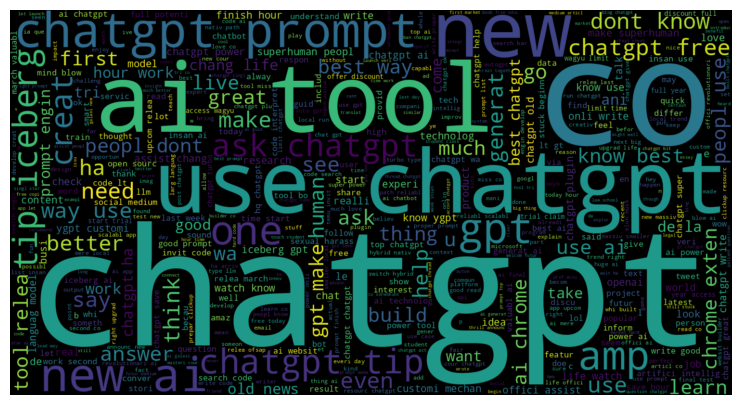

In [46]:
text = " ".join(data[data['sentiment'] == 'positive']['clean_text'])
plt.figure(figsize = (10, 5))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

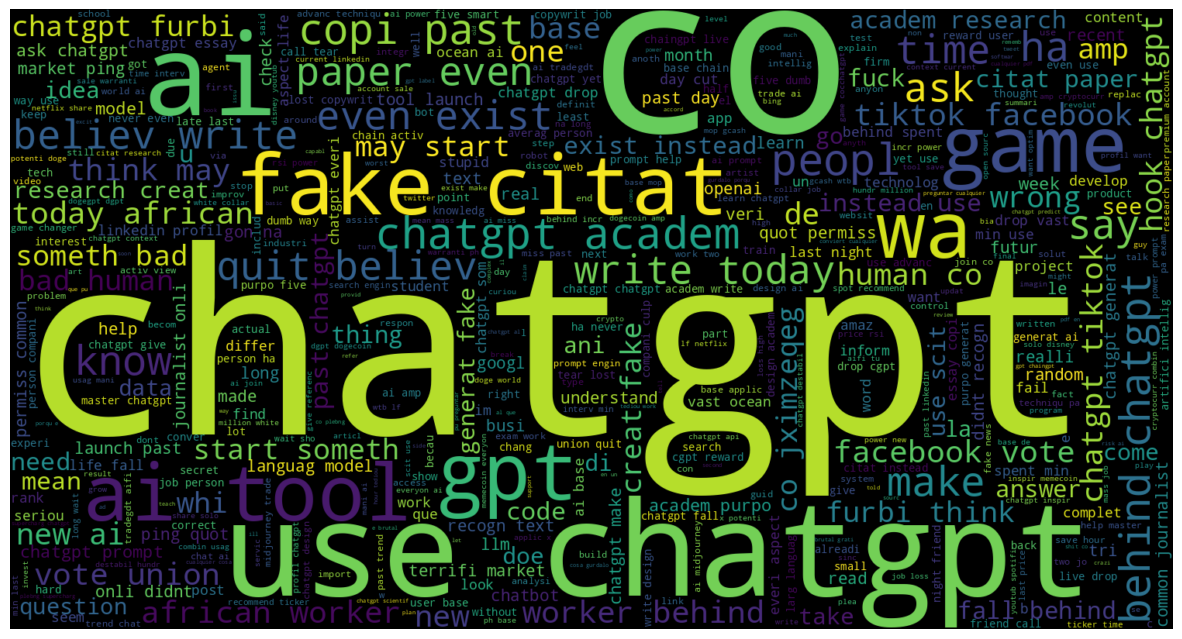

In [47]:
text = " ".join(data[data['sentiment'] == 'negative']['clean_text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

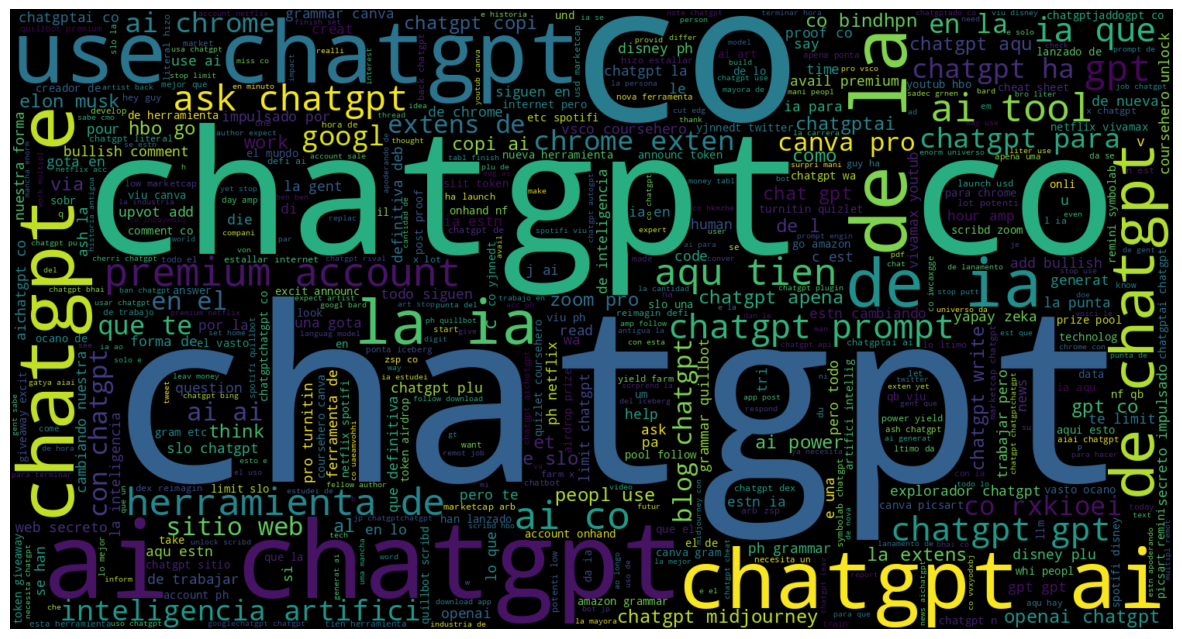

In [48]:
text = " ".join(data[data['sentiment'] == 'neutral']['clean_text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [49]:
from collections import Counter

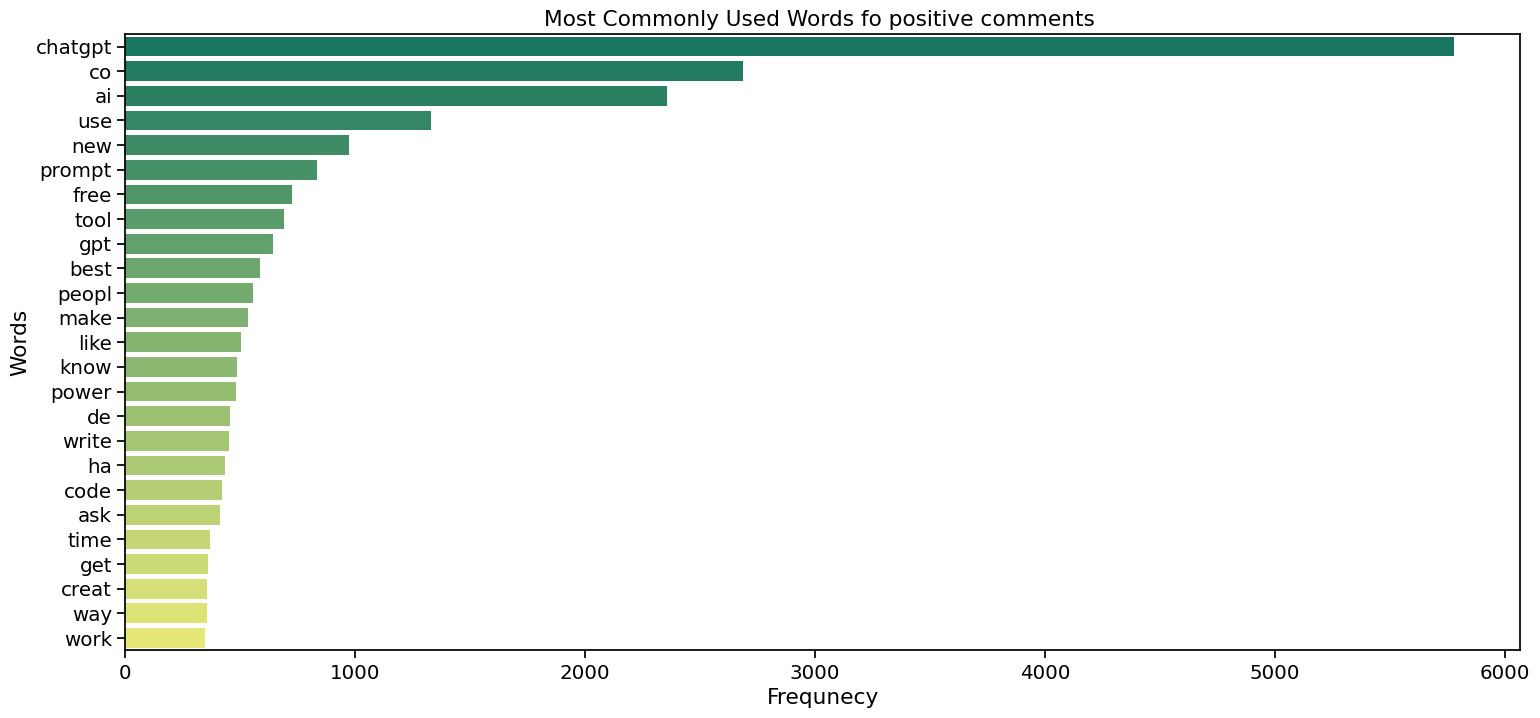

In [50]:
all_nodep_words = []
for sentence in data[data['sentiment'] == 'positive']['clean_text'].to_list():
    for word in sentence.split():
        all_nodep_words.append(word)

df = pd.DataFrame(Counter(all_nodep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words fo positive comments ")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

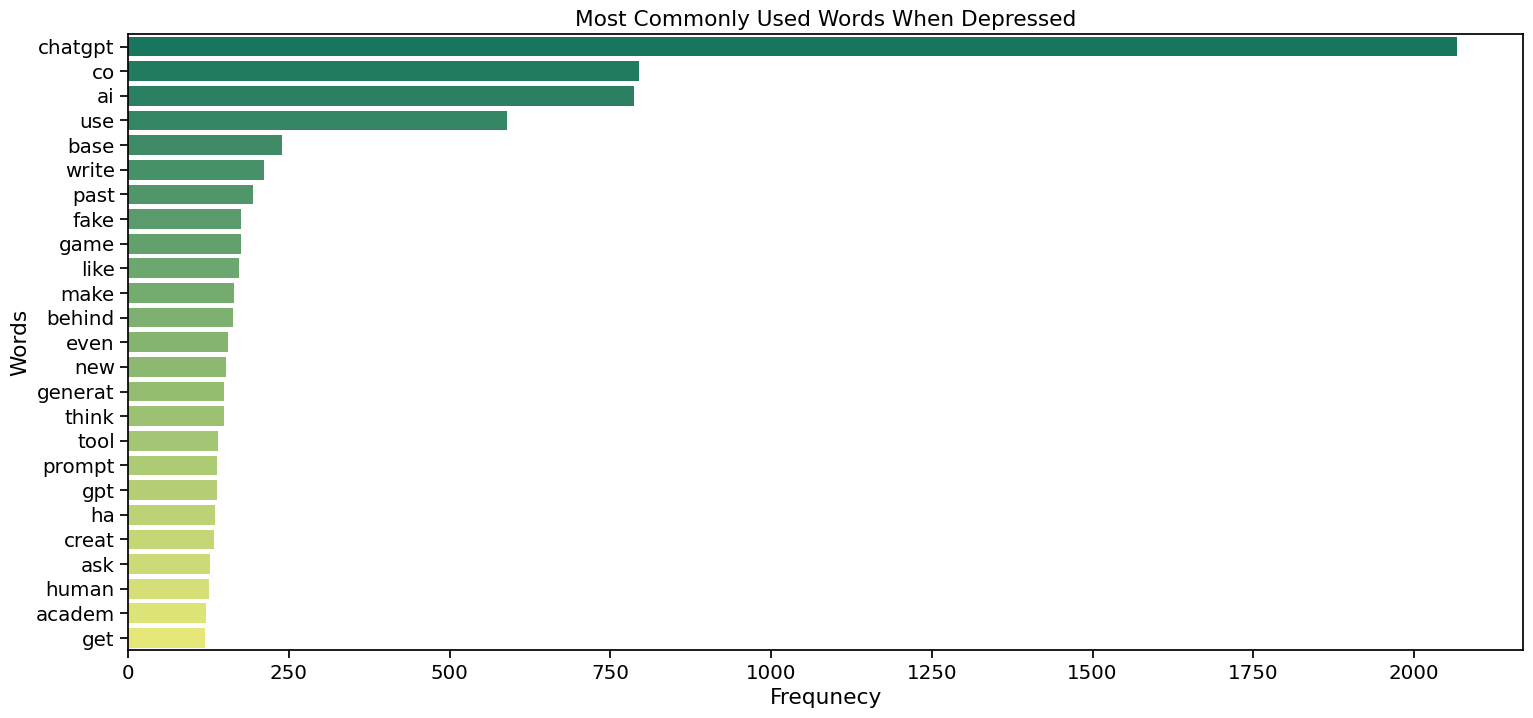

In [51]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

all_dep_words = []
for sentence in data[data['sentiment'] == 'negative']['clean_text'].to_list():
    for word in sentence.split():
        all_dep_words.append(word)

df = pd.DataFrame(Counter(all_dep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

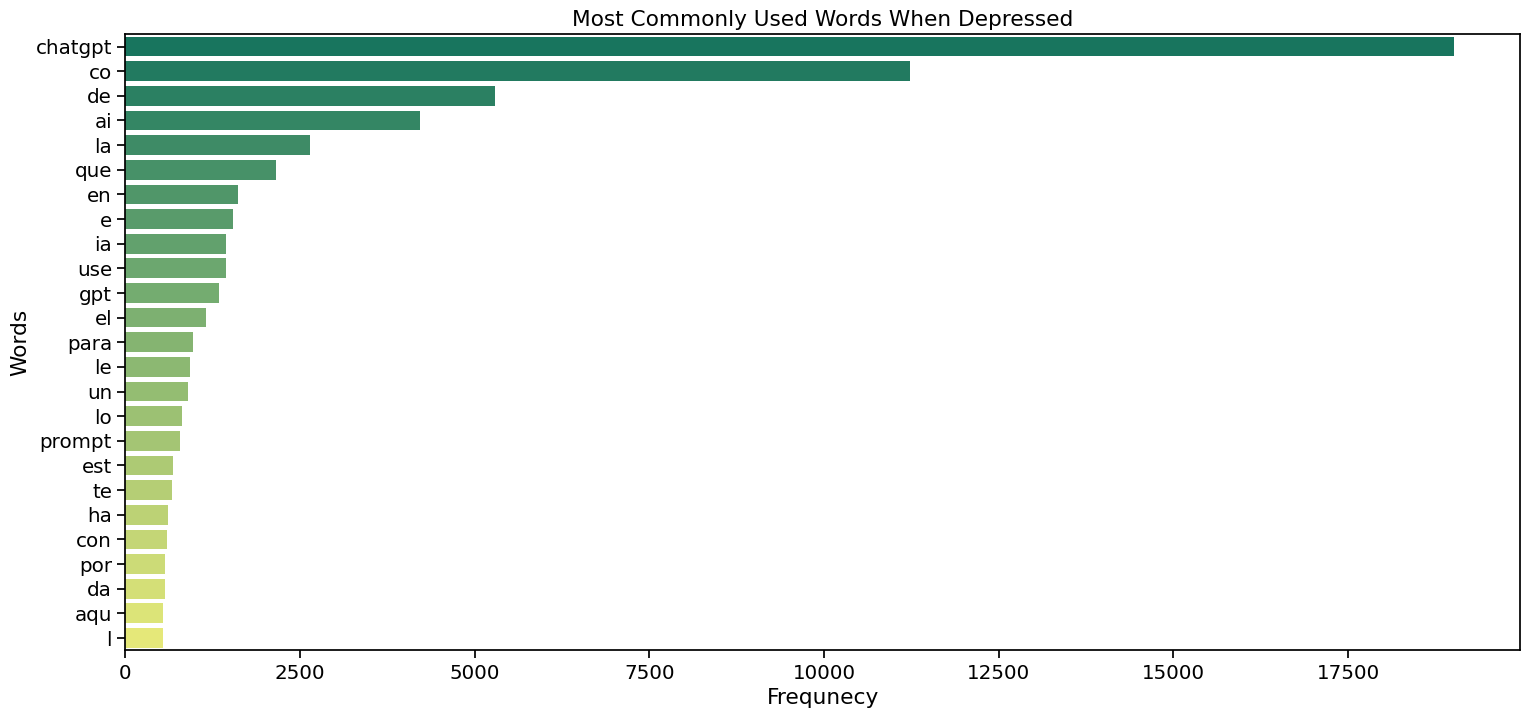

In [52]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

all_dep_words = []
for sentence in data[data['sentiment'] == 'neutral']['clean_text'].to_list():
    for word in sentence.split():
        all_dep_words.append(word)

df = pd.DataFrame(Counter(all_dep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

In [53]:
data.dtypes

tweet_id                             object
tweet_created           datetime64[ns, UTC]
tweet_extracted                      object
text                                 object
lang                                 object
user_id                              object
user_description                     object
user_created                         object
user_followers_count                float64
user_following_count                float64
user_tweet_count                    float64
user_verified                        object
retweet_count                       float64
like_count                          float64
reply_count                         float64
impression_count                    float64
OnlyDate                     datetime64[ns]
OnlyHour                              int64
OnlyMin                               int64
clean_text                           object
sentiment_polarity                  float64
sentiment                            object
dtype: object

In [54]:
data

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,retweet_count,like_count,reply_count,impression_count,OnlyDate,OnlyHour,OnlyMin,clean_text,sentiment_polarity,sentiment
0,1.642889622681432e+18,2023-04-03 13:59:44+00:00,2023-04-08 01:07:02.538242,RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...,th,4706577259,@JacksonWang852 ➖ รีวิว #รีวิวแบมพี #แบมพีอัพเ...,2016-01-04 02:27:33+00:00,1293.0,445.0,87051.0,False,13640.0,0.0,0.0,0.0,2023-04-03,13,59,chatgpt,0.000,neutral
1,1.6428442314496123e+18,2023-04-03 10:59:22+00:00,2023-04-08 01:06:59.379927,ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...,ja,2264288640,料理垢です。ｳｪｯﾌﾞ4年目 発言はファッキン個人の見解 TypeScript/Vue/Re...,2013-12-27 12:39:07+00:00,7878.0,4941.0,76597.0,False,0.0,0.0,0.0,290.0,2023-04-03,10,59,chatgptchrome co hfacfet,0.000,neutral
2,1.6427385624866693e+18,2023-04-03 03:59:28+00:00,2023-04-08 01:06:52.504868,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,💐💐।।जय श्री महाकाल।।💐💐,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,False,628.0,0.0,0.0,0.0,2023-04-03,3,59,chatgpt plugin fastest way get rich ive creat...,0.375,positive
3,1.6429198880616448e+18,2023-04-03 15:59:59+00:00,2023-04-08 01:07:04.742617,Get an intelligent chatbot for your website in...,en,1633040597782081537,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,False,0.0,0.0,0.0,58.0,2023-04-03,15,59,get intellig chatbot websit minut chatba ai tr...,0.000,neutral
4,1.642708351690711e+18,2023-04-03 01:59:25+00:00,2023-04-08 01:06:50.638068,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",en,1311403370670960640,Freedom is the Recognition of Necessity • Mark...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,False,0.0,0.0,0.0,0.0,2023-04-03,1,59,hey guy ha launch usd marketcap chatgpt dex ...,0.000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41994,1656811321336242178,2023-05-11 23:59:35+00:00,2023-05-13 20:37:51.581361,Fig gymnastics champion ChatGPT账号 \n#ChatGPT h...,cy,2290844445,自助下单秒发货: https://t.co/0BqnQAWxGy TG客服：\n@kara...,2014-01-19 02:30:50+00:00,106.0,228.0,281.0,False,10.0,10.0,11.0,7.0,2023-05-11,23,59,fig gymnast champion chatgpt co pllkdra,0.000,neutral
41995,1656675449316200448,2023-05-11 14:59:41+00:00,2023-05-13 20:37:39.928555,RT @hasantoxr: Best ChatGPT Prompts Technique ...,en,50418885,HR & stuff.,2009-06-24 20:07:46+00:00,6623.0,4875.0,79315.0,False,289.0,0.0,0.0,0.0,2023-05-11,14,59,best chatgpt prompt techniqu help master chatg...,1.000,positive
41997,1656630170374270977,2023-05-11 11:59:45+00:00,2023-05-13 20:37:36.406371,RT @LocalizerBrave: ホントのこと言ってもなかなか信じてくれなくてこのあと...,ja,3955907478,推しが尊い… 一応20↑,2015-10-20 08:10:24+00:00,137.0,290.0,170802.0,False,29.0,0.0,0.0,0.0,2023-05-11,11,59,chatgpt co ixuvaqwtl,0.000,neutral
42001,1656660334378360834,2023-05-11 13:59:37+00:00,2023-05-13 20:37:38.683546,RT @PythonPr: How to use ChatGPT in Python usi...,en,1590938064897003520,Twitterは俺のメモ帳,2022-11-11 05:23:04+00:00,5.0,45.0,81.0,False,114.0,0.0,0.0,0.0,2023-05-11,13,59,use chatgpt python use pychatgpt co ynyrvfivr,0.000,neutral


In [55]:
data.drop(["tweet_id", "tweet_created", "tweet_extracted", "lang","text","user_id", "user_description",
           "user_created", "user_followers_count", "user_following_count", "user_tweet_count",
           "user_verified", "sentiment_polarity",  "text",'retweet_count','reply_count','OnlyDate','OnlyHour','OnlyMin','like_count','impression_count'], axis=1, inplace=True)


In [56]:
data


,clean_text,sentiment
0,chatgpt,neutral
1,chatgptchrome co hfacfet,neutral
2,chatgpt plugin fastest way get rich ive creat...,positive
3,get intellig chatbot websit minut chatba ai tr...,neutral
4,hey guy ha launch usd marketcap chatgpt dex ...,neutral
...,...,...
41994,fig gymnast champion chatgpt co pllkdra,neutral
41995,best chatgpt prompt techniqu help master chatg...,positive
41997,chatgpt co ixuvaqwtl,neutral
42001,use chatgpt python use pychatgpt co ynyrvfivr,neutral


In [57]:
data.to_csv("extracted_output.csv", index=False)


### Sentiment Analysis

In [58]:
data.isna().sum()

clean_text    0
sentiment     0
dtype: int64

### Vectorization

### Train-Test Split

In [59]:
# Split the data into training and testing sets
X = data['clean_text']
y = data['sentiment']


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=10)

In [62]:
#checking shape of splitted data
print(X_train.shape)
y_test.shape

(24898,)


(10671,)

In [63]:
#checking splitted data
print(X_train.head())
y_train.head()

37473    deja de usar slo chatgpt entiendo por qu la ge...
1709                                        chatgpt       
38858             simpli product find chatgpt  co oqpmutpq
5053     think choo right choic becau make life much be...
28721                                         warn chatgpt
Name: clean_text, dtype: object


37473     neutral
1709      neutral
38858     neutral
5053     positive
28721     neutral
Name: sentiment, dtype: object

### Count Vectorization (Bag of words) and TF/IDF Vecorization

In [64]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [65]:
# Bag of words
cv=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
cv_X_train=cv.fit_transform(X_train.astype(str).str.strip())

In [66]:
# TF-IDF
tv=TfidfVectorizer(use_idf=True,max_df=1.0,min_df=5,ngram_range=(1,2),sublinear_tf=True)
tv_X_train=tv.fit_transform(X_train.astype(str).str.strip())

In [67]:
tv_X_train.shape

(24898, 11351)

In [68]:
cv_X_test=cv.transform(X_test.astype(str).str.strip())
tv_X_test=tv.transform(X_test.astype(str).str.strip())

In [69]:
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

### Implementing Models (Bag of Words) by Count Vectoriser

#### 1. Decision Tree Classifier with CV

In [70]:
# Initializing model
dt_cv=DecisionTreeClassifier()

#fitting the data to model
dt_cv.fit(cv_X_train,y_train)

#predicted values
pred_dt_cv=dt_cv.predict(cv_X_test)

In [71]:
pred_dt_cv

array(['neutral', 'positive', 'neutral', ..., 'positive', 'neutral',
       'neutral'], dtype=object)

In [72]:
# Accuracy
cv_score_dt_cv= cross_val_score(dt_cv,cv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_cv)))

Accuracy: 0.9454173149718779


In [73]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_cv))

              precision    recall  f1-score   support

    negative       0.83      0.78      0.80       772
     neutral       0.97      0.98      0.97      7683
    positive       0.92      0.89      0.90      2216

    accuracy                           0.95     10671
   macro avg       0.91      0.88      0.89     10671
weighted avg       0.95      0.95      0.95     10671



[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

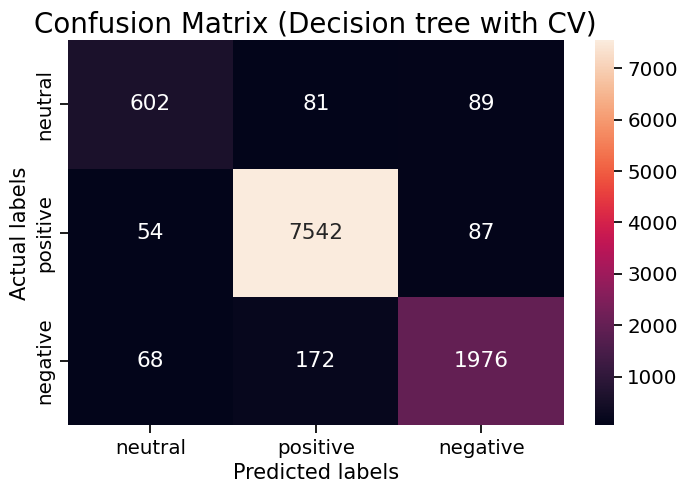

In [74]:
#Plotting Confussion matrix
cf2= (confusion_matrix(y_test,pred_dt_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision tree with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

##### Observation :
This model gives an accuracy score of 94.5% which implies that our model is performing well.

### 2. K-NN Count Vectorizer with GridsearchCV

In [75]:
# Initializing model
knn = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7,8]}
knn_cv = GridSearchCV(estimator=knn,param_grid=param)

#fitting the data to model
knn_cv.fit(cv_X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [76]:
#predicted values
pred_knn_cv = knn_cv.predict(cv_X_test)

In [77]:
pred_knn_cv

array(['neutral', 'neutral', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

In [78]:
# Accuracy
accuracy_KNN = accuracy_score(y_test,pred_knn_cv)
print("Accuracy :",(accuracy_KNN))

Accuracy : 0.8676787555055758


In [79]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_knn_cv))

              precision    recall  f1-score   support

    negative       0.90      0.51      0.65       772
     neutral       0.85      0.99      0.92      7683
    positive       0.96      0.56      0.71      2216

    accuracy                           0.87     10671
   macro avg       0.90      0.69      0.76     10671
weighted avg       0.88      0.87      0.85     10671



[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

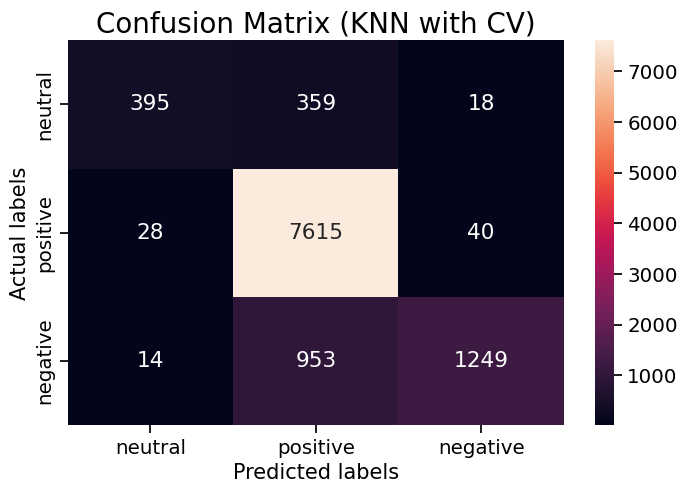

In [80]:
#Plotting Confussion matrix
cf4= (confusion_matrix(y_test,pred_knn_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


#### Observation :
The model is giving an accuracy score of 41% which implies that our model is underperforming.

### 3.SVM with CV

In [81]:
# Initializing model
svm_cv = SVC()

#fitting the data to model
svm_cv.fit(cv_X_train,y_train)

#prediction
pred_svm_cv = svm_cv.predict(cv_X_test)

In [82]:
pred_svm_cv

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

In [83]:
# Accuracy
accuracy_svc = accuracy_score(y_test,pred_svm_cv)
print("Accuracy :",(accuracy_svc))

Accuracy : 0.933558241964202


In [84]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_cv))

              precision    recall  f1-score   support

    negative       0.96      0.59      0.73       772
     neutral       0.93      1.00      0.96      7683
    positive       0.94      0.84      0.89      2216

    accuracy                           0.93     10671
   macro avg       0.94      0.81      0.86     10671
weighted avg       0.93      0.93      0.93     10671



[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

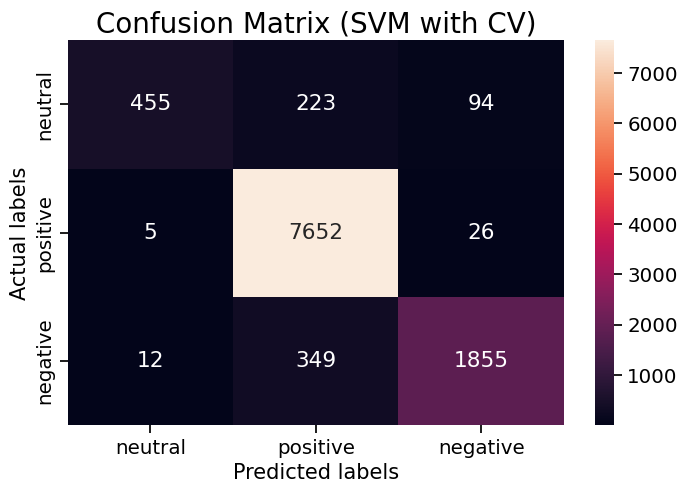

In [85]:
#Plotting Confussion matrix
cf5= (confusion_matrix(y_test,pred_svm_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf5, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (SVM with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### Observation :
This model gives an accuracy score of 93% which implies that our model is performing well.

## Implementing Models by TF/IDF Vectorizer

####  Decision tree classifier with TF/IDF

In [86]:
# Initializing model
dt_tv=DecisionTreeClassifier()

#fitting the data to model
dt_tv.fit(tv_X_train,y_train)

#prediction
pred_dt_tv=dt_tv.predict(tv_X_test)

In [87]:
pred_dt_tv

array(['neutral', 'positive', 'neutral', ..., 'positive', 'neutral',
       'neutral'], dtype=object)

In [88]:
# Accuracy
cv_score_dt_tv= cross_val_score(dt_tv,tv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_tv)))

Accuracy: 0.9332478820685433


In [89]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_tv))

              precision    recall  f1-score   support

    negative       0.85      0.77      0.81       772
     neutral       0.96      0.98      0.97      7683
    positive       0.91      0.89      0.90      2216

    accuracy                           0.95     10671
   macro avg       0.91      0.88      0.89     10671
weighted avg       0.94      0.95      0.95     10671



[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

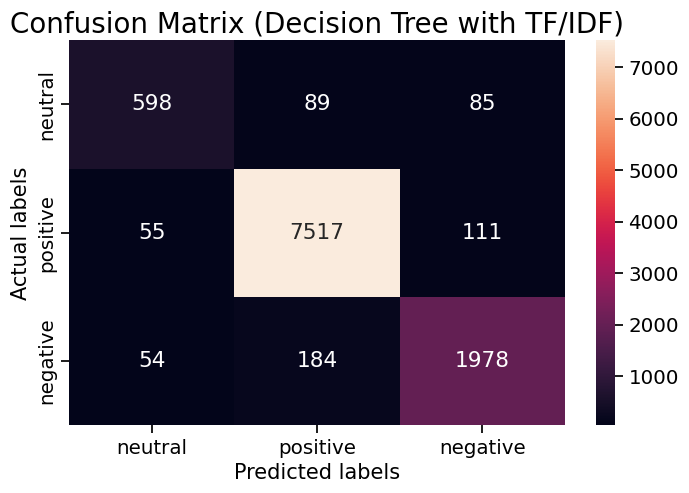

In [90]:
#Plotting Confussion matrix
cf2a= (confusion_matrix(y_test,pred_dt_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision Tree with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


### 5.XG-Boost classifier with TF/IDF

In [91]:
# Initializing model
xgb_tv=DecisionTreeClassifier()

#fitting the data to model
xgb_tv.fit(tv_X_train,y_train)

#prediction
pred_xgb_tv=xgb_tv.predict(tv_X_test)

In [92]:
pred_xgb_tv

array(['neutral', 'positive', 'neutral', ..., 'positive', 'neutral',
       'neutral'], dtype=object)

In [93]:
# Accuracy
cv_score_xgb_tv= cross_val_score(xgb_tv,tv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_xgb_tv)))

Accuracy: 0.9337298420434095


In [94]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_xgb_tv))

              precision    recall  f1-score   support

    negative       0.82      0.77      0.80       772
     neutral       0.97      0.98      0.97      7683
    positive       0.91      0.89      0.90      2216

    accuracy                           0.94     10671
   macro avg       0.90      0.88      0.89     10671
weighted avg       0.94      0.94      0.94     10671



[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

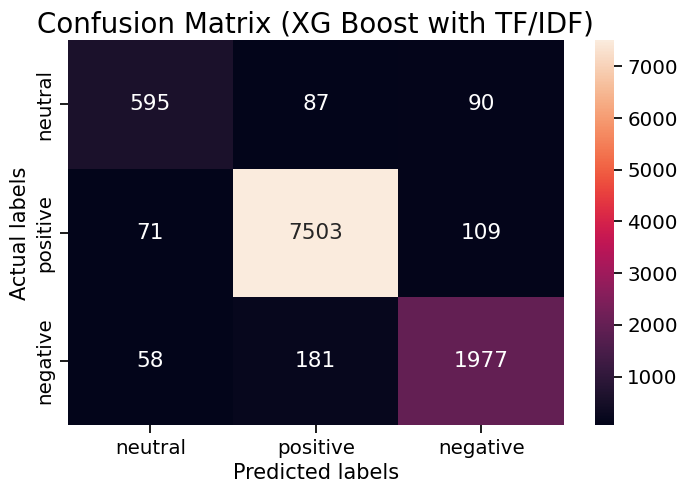

In [95]:
#Plotting Confussion matrix
cf3a= (confusion_matrix(y_test,pred_xgb_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (XG Boost with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

###  KNN TF/ID with GridsearchCV

In [96]:
# Initializing model
knn = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7,8]}
knn_tv = GridSearchCV(estimator=knn,param_grid=param)

#fitting the data to model
knn_tv.fit(tv_X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [97]:
#predicted values
pred_knn_tv = knn_cv.predict(tv_X_test)


In [98]:
pred_knn_tv

array(['neutral', 'neutral', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

In [99]:
# Accuracy
accuracy_KNN_tv = accuracy_score(y_test,pred_knn_tv)
print("Accuracy :",(accuracy_KNN_tv))

Accuracy : 0.721394433511386


In [100]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_knn_tv))

              precision    recall  f1-score   support

    negative       1.00      0.01      0.01       772
     neutral       0.72      1.00      0.84      7683
    positive       0.92      0.00      0.01      2216

    accuracy                           0.72     10671
   macro avg       0.88      0.34      0.29     10671
weighted avg       0.78      0.72      0.61     10671



[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

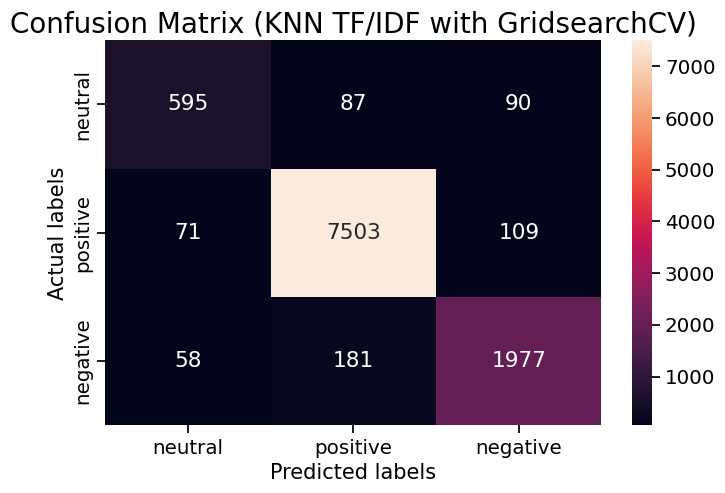

In [101]:
#Plotting Confussion matrix
cf4a= (confusion_matrix(y_test,pred_xgb_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN TF/IDF with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### Observation :
This model gives an accuracy score of 37% which implies that our model is underperforming

### SVM with TF/ID

In [102]:
# Initializing model
svm_tv = SVC()

#fitting the data to model
svm_tv.fit(tv_X_train,y_train)

#prediction
pred_svm_tv = svm_tv.predict(tv_X_test)

In [103]:
pred_svm_tv

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

In [104]:
# Accuracy
accuracy_svm_tv = accuracy_score(y_test,pred_svm_tv)
print("Accuracy :",(accuracy_svm_tv))

Accuracy : 0.9406803486083778


In [105]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_tv))

              precision    recall  f1-score   support

    negative       0.97      0.65      0.78       772
     neutral       0.94      1.00      0.97      7683
    positive       0.95      0.85      0.90      2216

    accuracy                           0.94     10671
   macro avg       0.95      0.83      0.88     10671
weighted avg       0.94      0.94      0.94     10671



[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

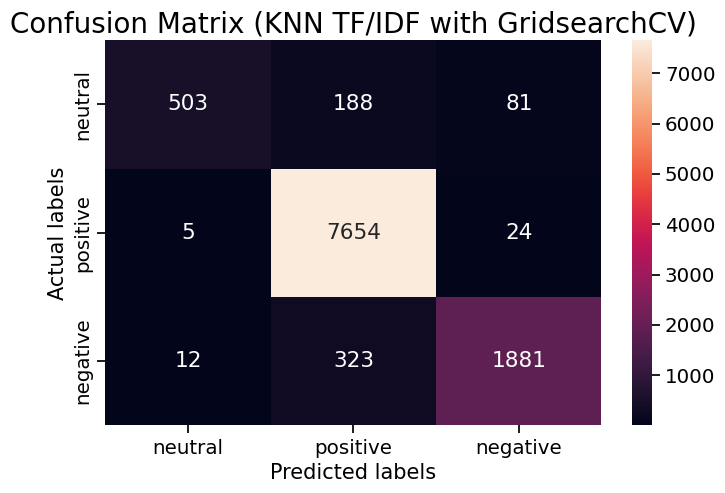

In [106]:
#Plotting Confussion matrix
cf5a= (confusion_matrix(y_test,pred_svm_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf5a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN TF/IDF with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### Observation :
This model gives an accuracy score of 94.06% which implies that our model is performing well.

In [108]:
# Model's acurracy Score Comparision

acurracy = {'Model':  ['Decision Tree Classifier','K-Nearest-Neighbours Classifier','Support-Vector-Machine Classifier'],
        'Count Vector':  [np.mean(cv_score_dt_cv),accuracy_KNN,accuracy_svc],
        'Tf/idf Vector': [np.mean(cv_score_dt_tv),accuracy_KNN_tv,accuracy_svm_tv]}

cv_score_table= pd.DataFrame (acurracy, columns = ['Model','Count Vector','Tf/idf Vector'])

cv_score_table

,Model,Count Vector,Tf/idf Vector
0,Decision Tree Classifier,0.945417,0.933248
1,K-Nearest-Neighbours Classifier,0.867679,0.721394
2,Support-Vector-Machine Classifier,0.933558,0.940680


### Conclusions:
1. We applied 3 different machine learing models namely Desision Tree Classifier, KNN, SVM Classifier for both Count Vector And TF IDF Vectorisation techniques.
2. We conclude that the machine is generating best results for Decision Tree Classifier with an  Accuracy score of 94.54% and 93.32% respectively for Count vector and TF/idf Vector, followed by SVM
3. Also, we observed that no overfitting is seen for the data, and we can deploy this model.
4. The sentiments of future tweets can be easily predicted using this model.